In [66]:
# K MEANS HIREARCHICHAL CLUSTRING 

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
df1 = pd.read_excel('/content/drive/MyDrive/Work/ML/Algorithms/K Means/kmean.xlsx', header=None)
df1.head()

,0,1
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


In [70]:
x = np.array(df1)

In [71]:
import random
initial_centroid = random.sample(range(0, len(df1)), 3)

In [72]:
initial_centroid

[224, 200, 223]

In [73]:
centroid = []
for i in initial_centroid:
  centroid.append(df1.loc[i])
centroid

[0    4.616524
 1    2.793207
 Name: 224, dtype: float64, 0    6.005065
 1    2.727842
 Name: 200, dtype: float64, 0    5.740362
 1    3.103913
 Name: 223, dtype: float64]

In [74]:
centroid = np.array(centroid)

In [75]:
centroid

array([[4.61652442, 2.79320715],
       [6.00506534, 2.72784171],
       [5.74036233, 3.10391306]])

In [76]:
# find the distance of each centroid
def eucliden_distance(x1, x2):
  return (sum(x1-x2)**2) ** 0.5

In [77]:
# find the closet distance of centroid
def find_closet_centroid(centroid, X):
  assigned_cluster = []
  for i in X:
    distance = []
    for j in centroid:
      distance.append(eucliden_distance(i, j))
    assigned_cluster.append(np.argmin(distance))
  return assigned_cluster

In [78]:
get_centroid = find_closet_centroid(centroid, x)

In [79]:
get_centroid

[0,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 0,
 1,
 1,
 0,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 0,
 2,
 0,
 1,
 2,
 2,
 2,
 0,
 1,
 2,
 1,


In [80]:
# controid update
def centroid_update(clusters, X):
  new_centroid = []
  new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns = ['cluster'])], axis=1)
  for c in set(new_df['cluster']):
    c_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
    new_mean = c_cluster.mean(axis=0)
    new_centroid.append(new_mean)
  return new_centroid

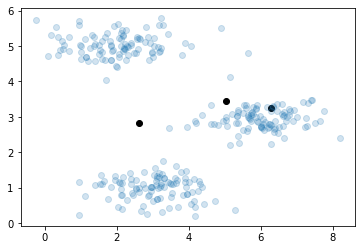

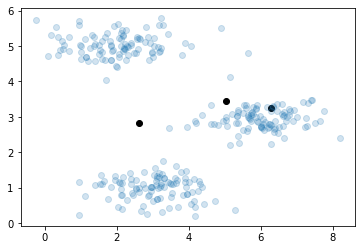

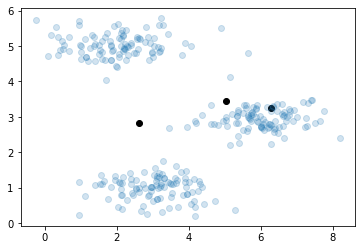

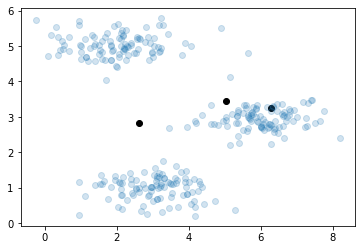

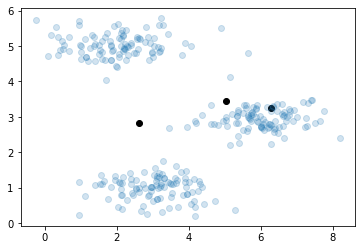

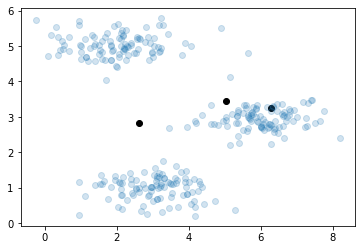

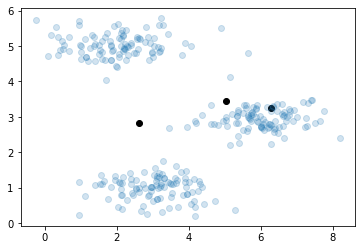

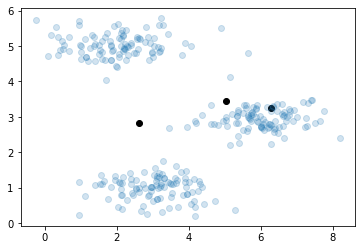

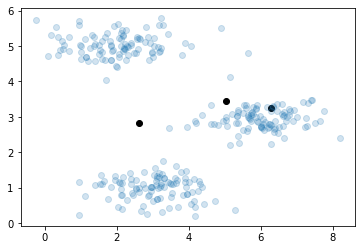

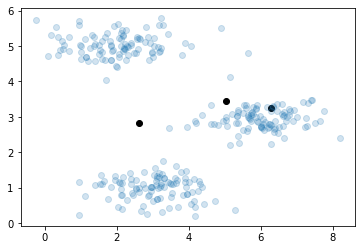

In [81]:
# training process
for i in range(10):
  get_centroid = find_closet_centroid(centroid, x)
  new_centroid = centroid_update(get_centroid, x)

  # plot the figure
  plt.figure()
  plt.scatter(np.array(new_centroid)[:,0], np.array(new_centroid)[:,1], color="black")
  plt.scatter(x[:,0], x[:,1],alpha=0.2)
  plt.show()